# T3: Práctica a entregar

A partir de la siguiente tabla de datos en la que:


- X: $log_{10}$(recuento inicial de leucocitos).
- Y: Tiempo de vida (supervivencia) en semanas desde diagnóstico.

\begin{array}{|r|rrrrrrrrr|}
  \hline
X &3.36&2.88&3.63&3.41&3.78&4.02&4&4.23&3.73\\
Y &65&156&100&134&36&108&90&20&39\\
   \hline
X &3.85&3.97&4.51&4.54&4.9&5&4.72&5&4.9 \\
Y &123&56&26&22&2&1&5&6&7 \\
   \hline
\end{array}



Se desea estudiar la relación: $E(Y_i)=exp(\beta_0+\beta_1X_i)$, que nos asegurará valores no negativos para las predicciones de $Y$. Además, consideraremos que Y tiene una distribución exponencial, muy usada en estudios de supervivencia.



1. Determina la función link adecuada.
2. Calcula el estimador $\beta$ máximo verosímil con R mediante un bucle a partir de la matriz W y el vector Z oportunos.
3. Usa la función glm() de R para comprobar la solución anterior.
4. Estudia si el modelo es significativo y calcula una medida de la bondad del ajuste.
5. Analiza gráficamente el modelo ajustado representando la recta obtenida en el gráfico $x / log(y)$ y la curva obtenida a partir de $\hat{y}$ en el gráfico $x / y$.
6. Calcula la expresión teórica y numérica de la deviance y los residuos. Comprueba que coincide con las salidas de glm().
7. Haz un análisis de residuos para validar el modelo.


Nota: la Poisson se usa en modelos discretos

In [2]:
x = c(3.36, 2.88, 3.63, 3.41, 3.78, 4.02, 4, 4.23, 3.73, 3.85, 3.97, 4.51, 4.54, 4.9, 5, 4.72, 5, 4.9)
y = c(65, 156, 100, 134, 36, 108, 90, 20, 39, 123, 56, 26, 22, 2, 1, 5, 6, 7)

1. Determina la función link adecuada.

Sean $\eta_i = \beta_0+\beta_1X_i$ y $\mu_i = E(Y_i)$, entonces la función link $g$ es una función monótona y diferenciable tal que:
\begin{equation*}
g(\mu_i) = \eta_i
\end{equation*}

En nuestro caso, tenemos que $E(Y_i)=exp(\beta_0+\beta_1X_i)$, o equivalentemente, que $\mu_i=exp(\eta_i)$.

Despejando $\eta_i$ obtenemos $\eta_i = \ln\mu_i$, de forma que la función link será:
\begin{equation*}
g(\mu_i) = \ln\mu_i
\end{equation*}

2. Calcula el estimador $\beta$ máximo verosímil con R mediante un bucle a partir de la matriz $W$ y el vector $z$ oportunos.

El estimador máximo verosímil de $\beta$ es:
\begin{equation*}
\hat\beta = (X^tWX)^{-1}X^tWz
\end{equation*}

siendo $W$ una matriz diagonal con:
\begin{equation*}
w_{ii} = \frac{1}{Var(y_i)}\left(\frac{\partial\mu_i}{\partial\eta_i}\right)^2
\end{equation*}

y $z$ un vector con:
\begin{equation*}
z_i = \sum_{k=1}^p x_{ik}\beta_k + (y_i - \mu_i)\frac{\partial\eta_i}{\partial\mu_i}
\end{equation*}

En nuestro caso, estamos considerando que $Y$ tiene una distribución exponencial, que hemos visto en el ejercicio 1 que pertenece a la familia exponencial. Para esta distribución se cumple que si $E(Y_i) = \mu_i$, entonces $Var(y_i) = \mu_i^2$.

Por otro lado, como $\mu_i=exp(\eta_i)$, entonces:
\begin{equation*}
\frac{\partial\mu_i}{\partial\eta_i} = exp(\eta_i) = \mu_i
\end{equation*}

De esta forma:
\begin{equation*}
w_{ii} = \frac{1}{Var(y_i)}\left(\frac{\partial\mu_i}{\partial\eta_i}\right)^2 = \frac{1}{\mu_i^2} \cdot\mu_i^2 = 1
\end{equation*}

Es decir, que la matriz $W$ es la identidad.

Además, se tiene que:
\begin{equation*}
z_i = x_i^t\beta + (y_i - \mu_i)\frac{\partial\eta_i}{\partial\mu_i} = \eta_i + (y_i - \mu_i)\frac{1}{\mu_i} = \eta_i + \frac{y_i}{\mu_i} - 1 = \eta_i+\frac{y_i}{e^{\eta_i}}-1 
\end{equation*}

In [3]:
X<-cbind(rep(1,18),x)
b.i<-c(1,1)
for(i in 1:40)
{
 nu.i<-X%*%b.i
 W.i<-diag(1,nrow=18)
 z.i<-nu.i+y/exp(nu.i)-1
 b.i<-solve(t(X)%*%W.i%*%X)%*%t(X)%*%W.i%*%z.i 
}
print(b.i)

       [,1]
  12.048672
x -2.058149


3. Usa la función glm() de R para comprobar la solución anterior.

In [4]:
model<-glm(y~x, family=Gamma(link="log")) 
summary(model)


Call:
glm(formula = y ~ x, family = Gamma(link = "log"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.36405  -0.64354  -0.07373   0.34752   1.06789  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12.0488     1.1167  10.790 9.44e-09 ***
x            -2.0582     0.2672  -7.704 9.01e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.4788588)

    Null deviance: 25.7236  on 17  degrees of freedom
Residual deviance:  8.6183  on 16  degrees of freedom
AIC: 164.01

Number of Fisher Scoring iterations: 8


In [5]:
model$coefficients

(Intercept)           x 
  12.048790   -2.058177

4. Estudia si el modelo es significativo y calcula una medida de la bondad del ajuste.

Para ver si el modelo es significativo, podemos comparar la deviance de nuestro modelo con la del modelo nulo. Sabemos que cuanto menor sea la deviance, mejor será el modelo, y además sabemos que la deviance del modelo nulo será la mayor, y por tanto, la peor. Para medir cuánto se distancia nuestro modelo del modelo nulo podemos calcular:
\begin{equation*}
\Delta D = D_{null} - D_{\hat\beta}
\end{equation*}

In [6]:
model$deviance
model$null.deviance

[1] 8.618323

[1] 25.72364

In [7]:
deviance_delta <- model$null.deviance - model$deviance
deviance_delta

[1] 17.10532

Observamos que $\Delta D >> 0$, lo que nos indica que el modelo es estadísticamente significativo.

Además, para calcular una medida de bondad del ajuste, podemos usar:

$$
R^2 = \frac{\mbox{null deviance} - \mbox{residual deviance} }{\mbox{null deviance}}
$$

- Si $R^2 \rightarrow 1$ implica que la Deviance del modelo es pequeña respecto de la Nula. Es decir, el modelo estimado mejora el modelo mucho, las variables están aportando valor al modelo.

- Si $R^2 \rightarrow 0$ implica que la Deviance del modelo puede no ser muy diferente a la Nula. Es decir, el modelo estimado puede no estar siendo mucho mas potente que el modelo nulo.

In [8]:
deviance_delta / model$null.deviance

[1] 0.6649649

Un $R^2=0.665$ significa que el modelo estimado mejora un 66.5% el modelo nulo, siendo hasta el 100% la mejora máxima alcanzable (el modelo con deviance 0, el modelo perfecto).

5. Analiza gráficamente el modelo ajustado representando la recta obtenida en el gráfico $x / log(y)$ y la curva obtenida a partir de $\hat{y}$ en el gráfico $x / y$.

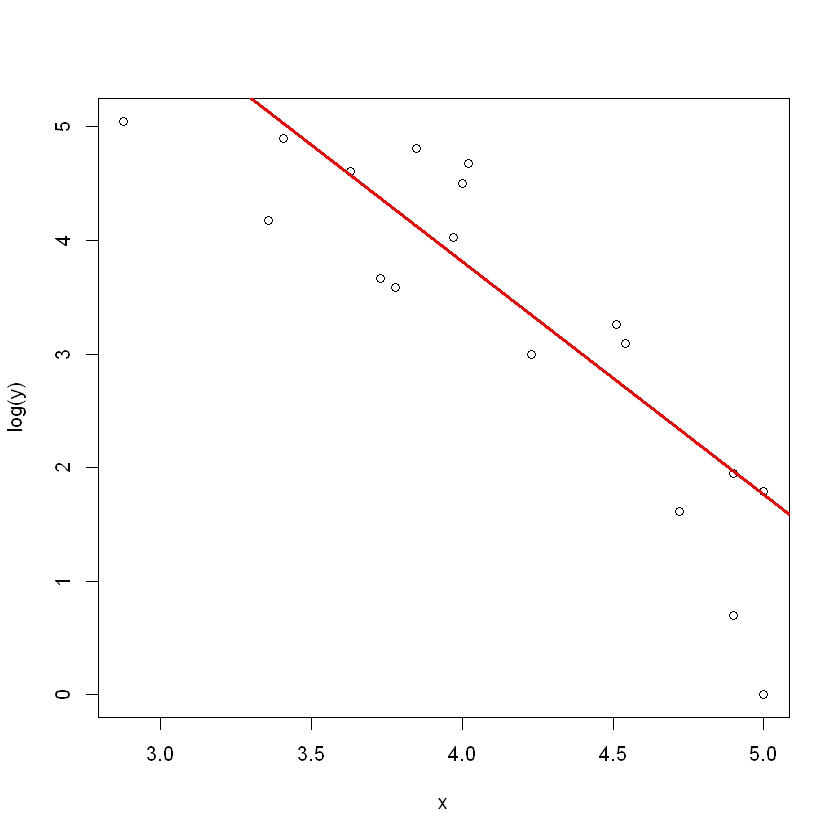

In [9]:
plot(x,log(y))
abline(coef(model),lty=1, lwd=3,col=2)

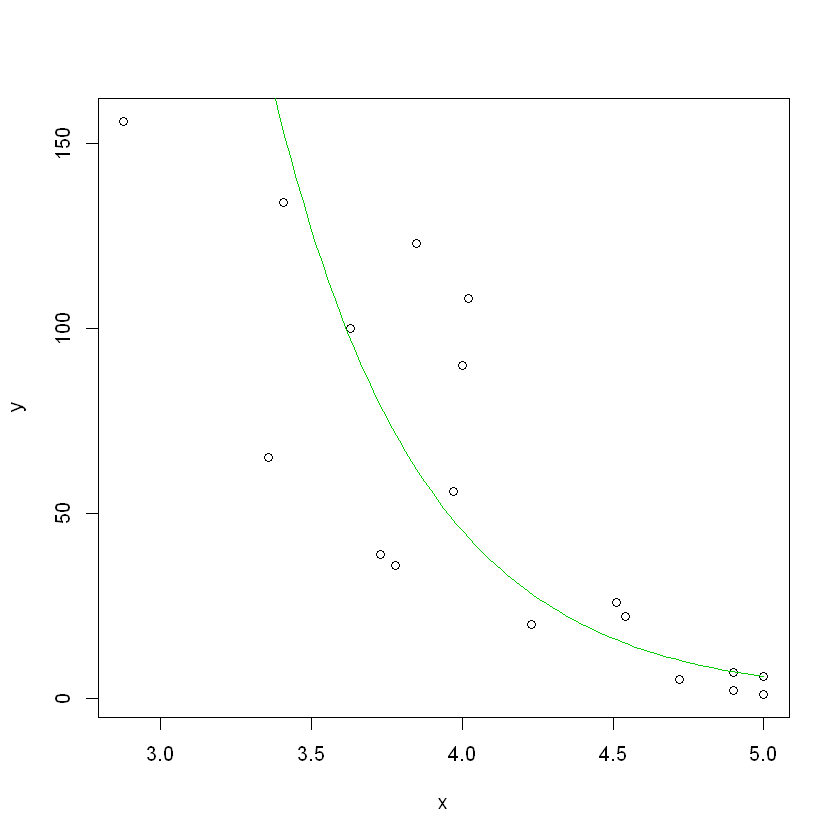

In [13]:
plot(x,y) 
curve(exp(12.048672-2.058149*x), add=T, col=3)

6. Calcula la expresión teórica y numérica de la deviance y los residuos. Comprueba que coincide con las salidas de glm().

Estamos considerando que Y tiene una distribución exponencial, luego $f(y,\theta)=\theta e^{-y\theta} = \exp(-y\theta + \ln\theta)$. Entonces:
\begin{equation*}
l(\theta|y)= \sum_{i=1}^{18}(-y_i\theta_i + \ln\theta_i)
\end{equation*}
donde $\theta_i = \frac{1}{E(Y_i)} = \frac{1}{\mu_i} = \frac{1}{exp(\eta_i)}$.

Empezamos calculando $\eta_i = \beta_0+\beta_1X_i$.

In [13]:
b <- model$coefficients
nu <- X%*%b
theta <- 1/exp(nu)
l = 0
for(i in 1:18)
{
l = l - y[i]*theta[i] + log(theta[i])
}
-2*l

[1] 163.3762

In [14]:
model$deviance

[1] 8.618323

In [69]:
y-exp(nu)

-104.5783391
-299.4290933
2.7186629
-18.9951374
-35.4416182
64.4060636
44.5741370
-8.2954457
-40.1852027
61.1440567
7.6809000


In [84]:
res = model$residuals
res

1           2           3           4           5           6 
-0.61669633 -0.65746589  0.02794640 -0.12415517 -0.49609204  1.47740876 
          7           8           9          10          11          12 
 0.98125020 -0.29317247 -0.50748374  0.98849122  0.15896199  0.63506945 
         13          14          15          16          17          18 
 0.47163865 -0.71932981 -0.82759423 -0.51555731  0.03443463 -0.01765432

7. Haz un análisis de residuos para validar el modelo.

En primer lugar, vemos que los residuos siguen una distribución normal:

In [85]:
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.91797, p-value = 0.119


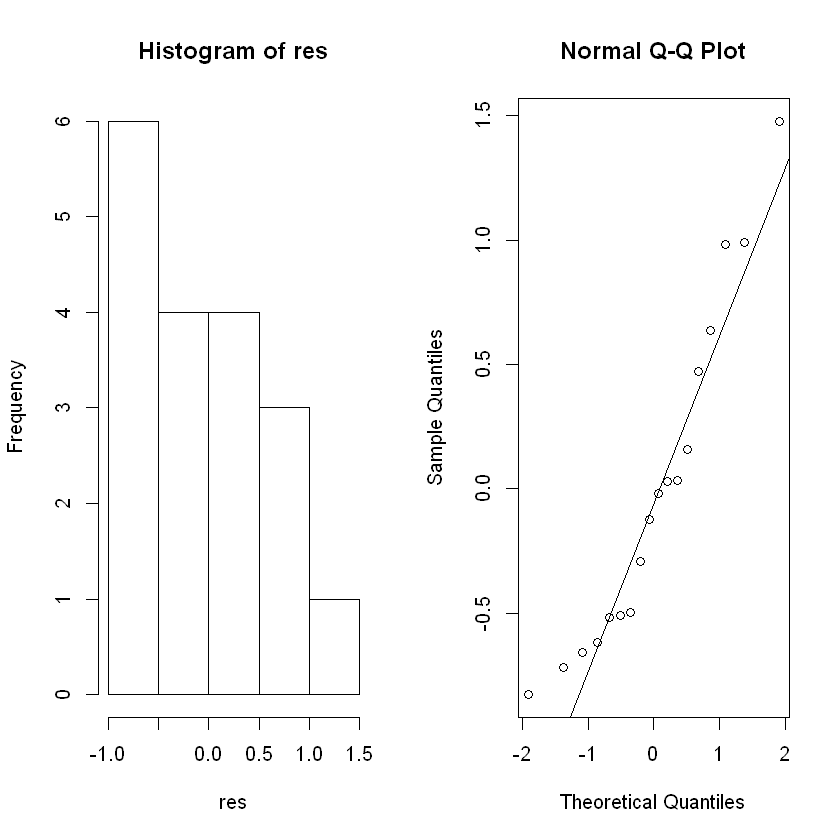

In [86]:
par(mfrow=c(1,2))
hist(res)
qqnorm(res)
qqline(res)

Además, los residuos son independientes entre ellos, ya que al plotearlos no se observan patrones:

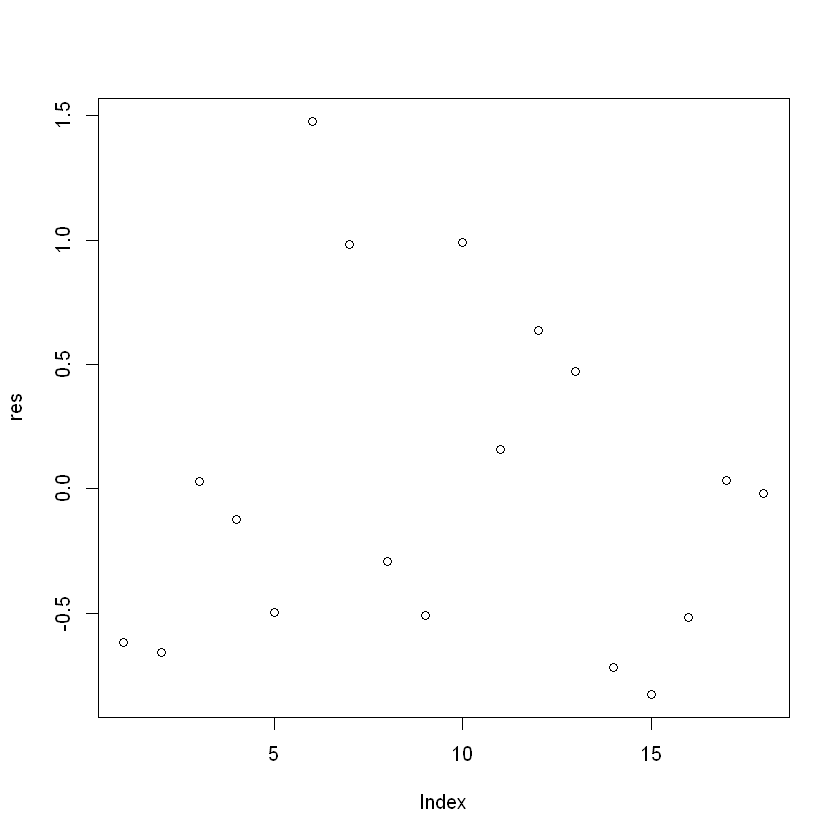

In [87]:
plot(res)

Por último, observamos que no hay outliers en los residuos:

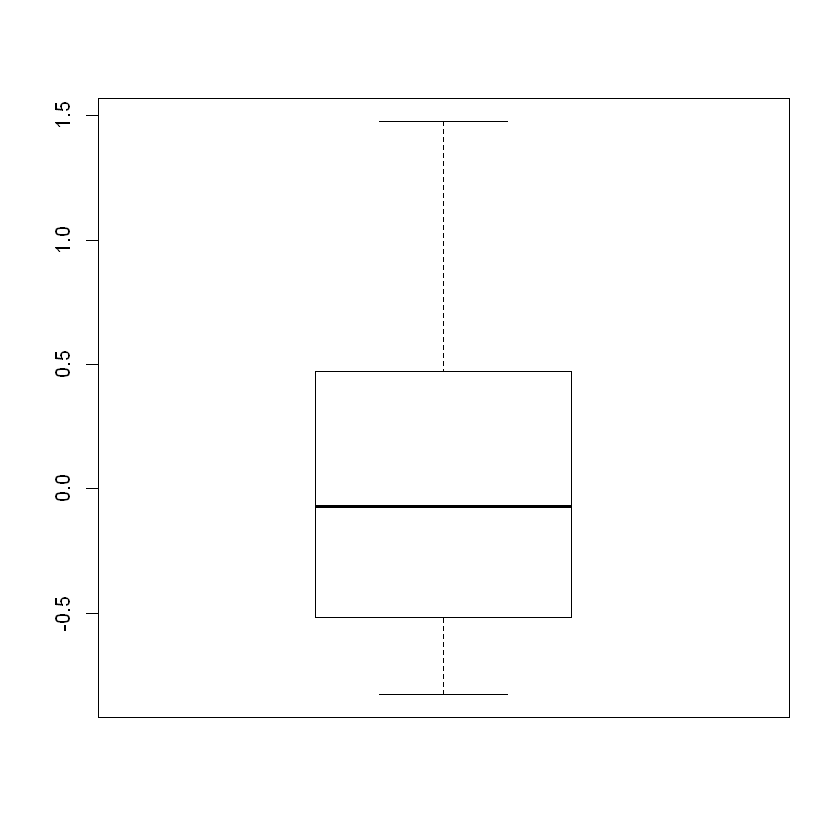

In [88]:
boxplot(res)